### Поиск и выбор набора данных для построения моделей машинного обучения
В качестве набора данных мы будем использовать набор данных, содержащий информацию об суицидах в мире с 1985 по 2016 https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016?resource=download

Эта задача является очень актуальной для выявления отрезков времени, на которые пришлись всплески случаев суицида, для дальнейшего анализа общемировой ситуации в данные отрезки времени.  

Датасет состоит ииз одного файла master.csv

Файл содержит следующие колонки:

* country
* year
* id
* sex
* age
* suicides_no
* population
* suicides/100k pop
* country-year
* gdp_for_year ($)	
* generation

В данной работе будем решать задачи регрессии.


### Импорт библиотек

Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первых ячейках ноутбука.


In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [71]:
data = pd.read_csv('C:\master.csv', sep=",")

In [72]:
#original2000 = original.head(2000)

In [73]:
#data = original2000.drop_duplicates()

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
### Основные характенристики набора данных
Первые и последние 5 строк выборки из датасета (далее - датасета)

In [74]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


список колонок с типами данных

In [75]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

Как все данные определены верно

In [76]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Провекряем наличие пропущенных значений

In [77]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

 Вывод:Представленный набор данных содержит пустые значения.


In [78]:
data=data.drop(columns = ['HDI for year'],axis = 1)

In [79]:
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

теперь предоставленный набор данных не содержит пустые значения.

## Построение графиков для понимания структуры данных
Парные диаграммы


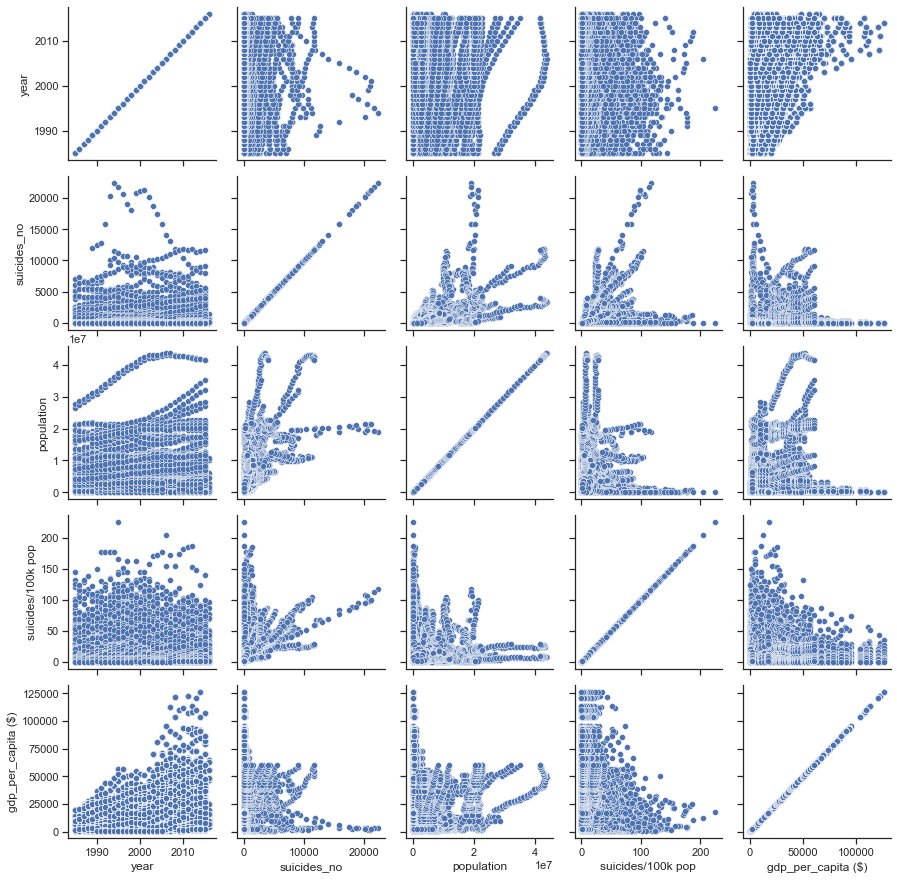

In [80]:
sns.PairGrid(data).map(sns.scatterplot)

# Обработка данных
## Кодирование категориальных признпков
Поскольку алгоритмы машинного обучения вог многих библиотеках не работают с категориальными признаками, то закодируекм их с помощью LabelEncoder

In [81]:
le = LabelEncoder()
    # "country "
le.fit(data.country.drop_duplicates()) 
data.country  = le.transform(data.country)
    # "sex"
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
    # "age"
le.fit(data.age.drop_duplicates()) 
data.age = le.transform(data.age)
    # "generation"
le.fit(data.generation.drop_duplicates()) 
data.generation = le.transform(data.generation)

In [82]:
data_clone = data.copy()

## Масштабирование данных
Для улучшения качества алгоритмов машинного обучения отмасштабируем данные.


In [83]:
# Числовые колонки для масштабирования
scale_cols = ['year', 'suicides_no', 'suicides/100k pop', 'gdp_per_capita ($)', 'population']

In [84]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_clone[scale_cols])


Добавим масштабированные данные в набор данных


In [85]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_clone[new_col_name] = sc1_data[:,i]

In [86]:
data_clone

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,year_scaled,suicides_no_scaled,suicides/100k pop_scaled,gdp_per_capita ($)_scaled,population_scaled
0,0,1987,1,0,21,312900,6.71,Albania1987,"2,156,624,900",796,2,0.064516,0.000940,0.029826,0.004322,0.007137
1,0,1987,1,2,16,308000,5.19,Albania1987,"2,156,624,900",796,5,0.064516,0.000716,0.023070,0.004322,0.007025
2,0,1987,0,0,14,289700,4.83,Albania1987,"2,156,624,900",796,2,0.064516,0.000627,0.021470,0.004322,0.006607
3,0,1987,1,5,1,21800,4.59,Albania1987,"2,156,624,900",796,1,0.064516,0.000045,0.020403,0.004322,0.000491
4,0,1987,1,1,9,274300,3.28,Albania1987,"2,156,624,900",796,0,0.064516,0.000403,0.014580,0.004322,0.006256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,0,2,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,2,0.935484,0.004790,0.013157,0.016320,0.082652
27816,100,2014,0,5,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,5,0.935484,0.000403,0.011468,0.016320,0.007949
27817,100,2014,1,3,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,3,0.935484,0.002686,0.009646,0.016320,0.063050
27818,100,2014,0,3,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,3,0.935484,0.001970,0.007423,0.016320,0.060069


Проверяем, что масштабирование не повлияло на распределение данных

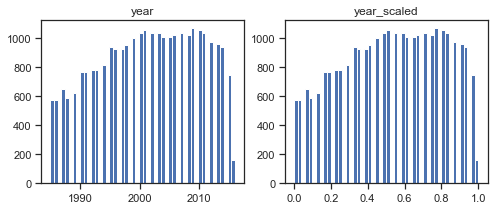

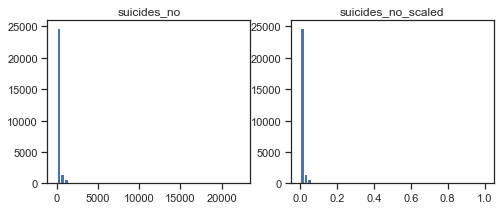

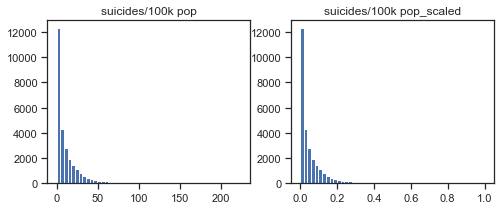

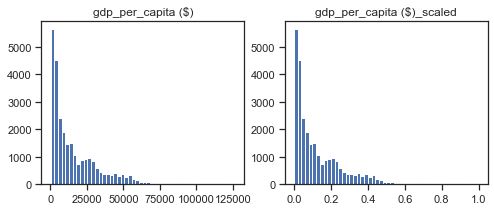

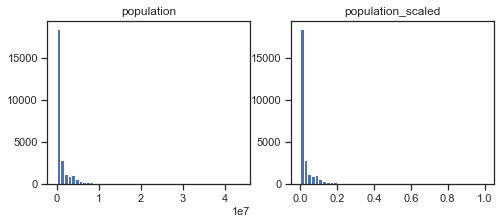

In [87]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_clone[col], 50)
    ax[1].hist(data_clone[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [88]:
corr_cols_1 = data_clone.columns[:-5]
corr_cols_1

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [89]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['year_scaled',
 'suicides_no_scaled',
 'suicides/100k pop_scaled',
 'gdp_per_capita ($)_scaled',
 'population_scaled']

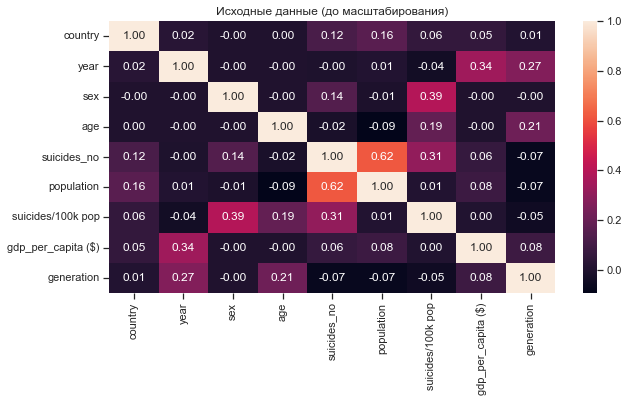

In [90]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_clone[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

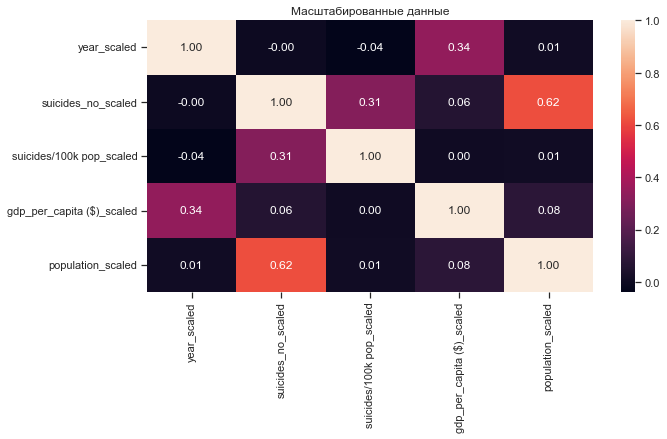

In [91]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_clone[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

* Корреляционные матрицы для исходных и масштабированных данных совпадают.
* ...

## Выбор метрик для последующей оценки качества моделей.
В качестве метрик для решения задачи классификации будем использовать:

### Сохранение и визуализация метрик
Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [92]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = pd.concat([self.df, pd.DataFrame(temp)], ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

# Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.
Для задачи регрессии будем использовать следующие модели:

* Линейная регрессия
* Метод ближайших соседей
* Машина опорных векторов
* Решающее дерево
* Случайный лес
* Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных.
На основе масштабированных данных выделим обучающую и тестовую выборки с помощью фильтра

In [93]:
X = data_clone[["country", "sex", "age", "suicides_no_scaled", "population_scaled", "suicides/100k pop_scaled", "gdp_per_capita ($)_scaled", "generation"]]
Y = data_clone["year_scaled"]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())




Входные данные:

    country  sex  age  suicides_no_scaled  population_scaled  \
0        0    1    0            0.000940           0.007137   
1        0    1    2            0.000716           0.007025   
2        0    0    0            0.000627           0.006607   
3        0    1    5            0.000045           0.000491   
4        0    1    1            0.000403           0.006256   

   suicides/100k pop_scaled  gdp_per_capita ($)_scaled  generation  
0                  0.029826                   0.004322           2  
1                  0.023070                   0.004322           5  
2                  0.021470                   0.004322           2  
3                  0.020403                   0.004322           1  
4                  0.014580                   0.004322           0   

Выходные данные:

 0    0.064516
1    0.064516
2    0.064516
3    0.064516
4    0.064516
Name: year_scaled, dtype: float64


In [94]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 2022, test_size = 0.1)

### Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
Решение задачи регрессии


In [95]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [96]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [97]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [98]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.207, MSE=0.064, R2=0.163
KNN_5 	 MAE=0.077, MSE=0.01, R2=0.875
SVR 	 MAE=0.21, MSE=0.067, R2=0.123
Tree 	 MAE=0.059, MSE=0.01, R2=0.873
RF 	 MAE=0.051, MSE=0.005, R2=0.939
GB 	 MAE=0.113, MSE=0.019, R2=0.751


#### Подбор гиперпараметров для выбранных моделей с использованием методов кросс-валидации.

In [100]:
n_range = np.array(range(1,1000,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
          66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
         131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
         196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
         261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321,
         326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386,
         391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451,
         456, 461, 466, 471, 476, 481, 486, 491, 496, 501, 506, 511, 516,
         521, 526, 531, 536, 541, 546, 551, 556, 561, 566, 571, 576, 581,
         586, 591, 596, 601, 606, 611, 616, 621, 626, 631, 636, 641, 646,
         651, 656, 661, 666, 671, 676, 681, 686, 691, 696, 701, 706, 711,
         716, 721, 726, 731, 736, 741, 746, 751, 756, 761, 766, 771, 776,
         781, 786, 791, 796, 801, 806, 811, 816, 821, 826, 831, 836, 841,
         846, 851, 856,

In [101]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, Y_train)

CPU times: total: 9min 3s
Wall time: 9min 4s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
       261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321,
       326, 331, 336, 341, 346, 351, 356,...
       586, 591, 596, 601, 606, 611, 616, 621, 626, 631, 636, 641, 646,
       651, 656, 661, 666, 671, 676, 681, 686, 691, 696, 701, 706, 711,
       716, 721, 726, 731, 736, 741, 746, 751, 756, 761, 766, 771, 776,
       781, 786, 791, 796, 801, 806, 811, 816, 821, 826, 831, 836, 841,
       846, 851, 856, 861, 866, 871, 876, 881, 886, 891, 896, 901, 906,
       911, 916, 921, 926, 931, 936, 941, 946, 951, 956, 961, 966, 971,
       976, 981, 986, 991, 996])}],
             scoring='neg_mean_squared_error')

In [102]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=1)

In [103]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 1}

In [104]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'1'

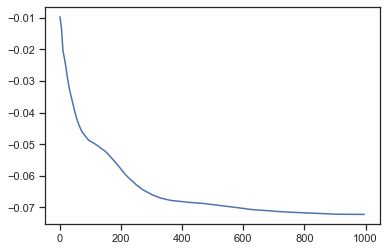

In [105]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.


In [106]:
regr_models_grid = {'KNN_5':KNeighborsRegressor(n_neighbors=5), str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [107]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN_5 	 MAE=0.077, MSE=0.01, R2=0.875
KNN_1 	 MAE=0.07, MSE=0.009, R2=0.884


#### Формирование выводов о качестве построенных моделей на основе выбранных метрик.
Метрики качества модели

In [108]:
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

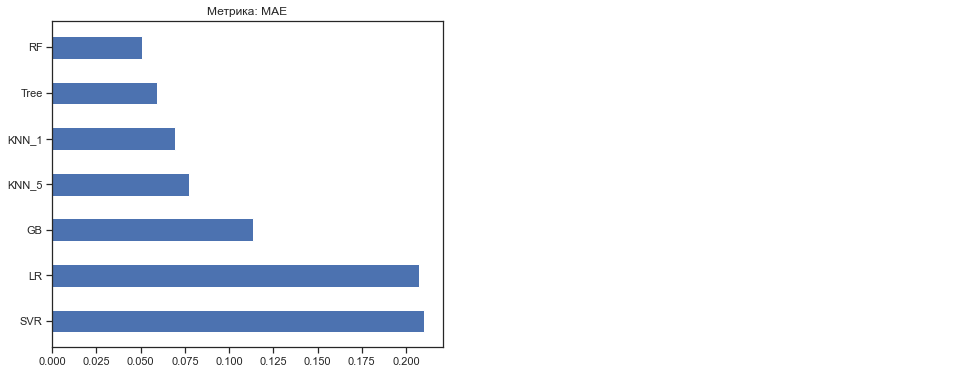

In [109]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

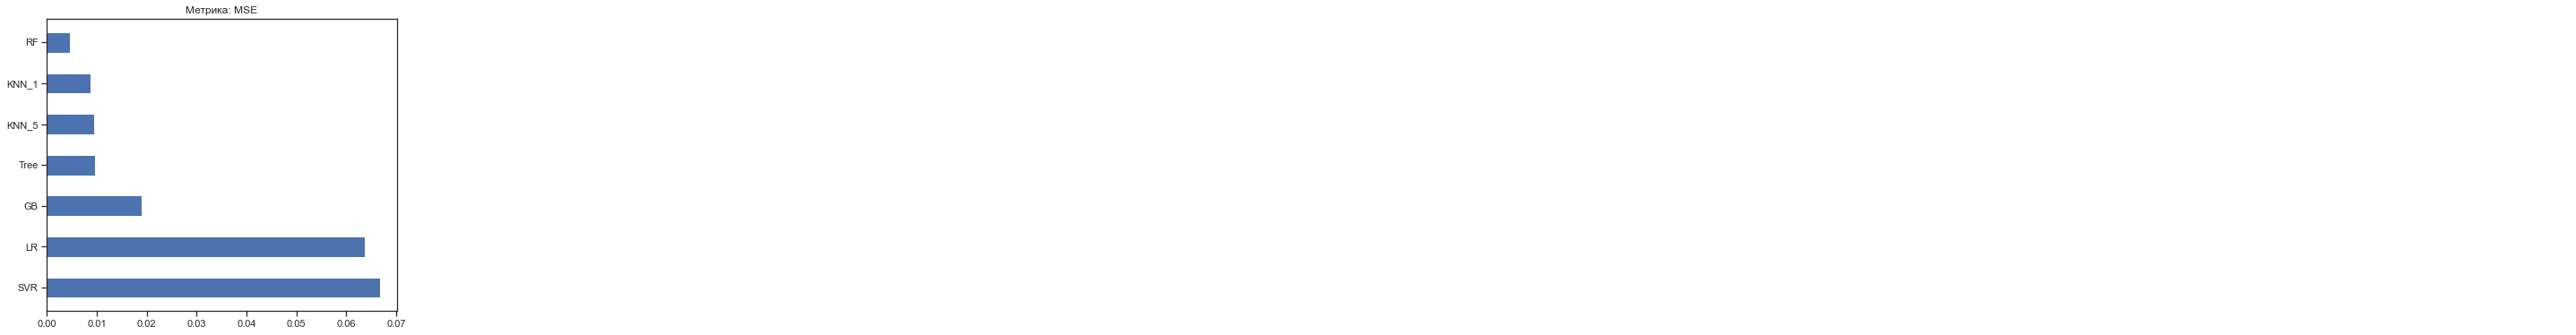

In [110]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

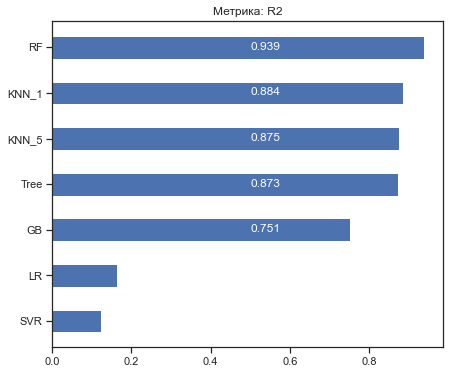

In [111]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

### Вывод
На основании двух метрик из трёх используемых, лучшей оказалась модель на основе метода опорных векторов (SVR)